In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pooch
from IPython.display import display, HTML
import plotly.express as px
import matplotlib.pyplot as plt
import os
#from fair import FAIR
#from fair.interface import fill, initialise
#from fair.io import read_properties
from scipy.integrate import cumtrapz

In [2]:
import sys
sys.path.append('../') 
from utils.majorghg_modA import *
from utils.majorghg_modB_whRF import * 
from utils.majorghg_extra_analy import *

 for SSP scn, only enter number e.g., 119, 585 without SSP 
 for metric_toget, fetch only IRF if rolling_Y approach 
 MYs should match MY defined for FaIR


## 1. get  instantaneous radiative forcing (IRF), rolling_y approach  

In [3]:
# in  ModuleA, it's re-named as metric + sys-date
cf_f = "output/metrics_2024-06-28"

In [4]:
# only get the first 75 years to speed-up
x36 = rolling_Y_analysis(metric_toget = "IRF", MYs = 2000 + np.arange(25,100,1),  cf_folder = cf_f )

In [5]:
cf_col_gas_allgas, cf_col_gas = x36.get_gas_metric()

read point value for CO2 SSP 119, model year 2025, metric: IRF
read point value for CO2 SSP 119, model year 2026, metric: IRF
read point value for CO2 SSP 119, model year 2027, metric: IRF
read point value for CO2 SSP 119, model year 2028, metric: IRF
read point value for CO2 SSP 119, model year 2029, metric: IRF
read point value for CO2 SSP 119, model year 2030, metric: IRF
read point value for CO2 SSP 119, model year 2031, metric: IRF
read point value for CO2 SSP 119, model year 2032, metric: IRF
read point value for CO2 SSP 119, model year 2033, metric: IRF
read point value for CO2 SSP 119, model year 2034, metric: IRF
read point value for CO2 SSP 119, model year 2035, metric: IRF
read point value for CO2 SSP 119, model year 2036, metric: IRF
read point value for CO2 SSP 119, model year 2037, metric: IRF
read point value for CO2 SSP 119, model year 2038, metric: IRF
read point value for CO2 SSP 119, model year 2039, metric: IRF
read point value for CO2 SSP 119, model year 2040, metr

In [6]:
cf_col_gas_allgas[2] == cf_col_gas

True

In [7]:
cf_df = x36.prep_CF_pds( cf_col_gas_allgas, cf_col_gas )
cf_df

['SSP', 'ModelYear', 'Year', 'CO2_IRF', 'CH4_IRF', 'N2O_IRF']


,SSP,ModelYear,Year,CO2_IRF,CH4_IRF,N2O_IRF
0,119,2025,0,1.987496e-15,2.205437e-13,3.099572e-13
1,119,2025,1,1.857365e-15,2.019491e-13,3.075662e-13
2,119,2026,0,1.979328e-15,2.207271e-13,3.092630e-13
3,119,2026,1,1.849731e-15,2.022929e-13,3.068478e-13
4,119,2027,0,1.972169e-15,2.210606e-13,3.085103e-13
...,...,...,...,...,...,...
445,585,2097,1,8.203165e-16,1.732252e-13,2.700476e-13
446,585,2098,0,8.686672e-16,1.897607e-13,2.723055e-13
447,585,2098,1,8.117914e-16,1.735343e-13,2.694940e-13
448,585,2099,0,8.594807e-16,1.901209e-13,2.718101e-13


In [8]:
# for IRF, let's filter only Y[0]
cf_df_y0 = x36.CF_pds_filterY0(cf_df)
cf_df_y0

,SSP,ModelYear,Year,CO2_IRF,CH4_IRF,N2O_IRF
0,119,2025,0,1.987496e-15,2.205437e-13,3.099572e-13
2,119,2026,0,1.979328e-15,2.207271e-13,3.092630e-13
4,119,2027,0,1.972169e-15,2.210606e-13,3.085103e-13
6,119,2028,0,1.965813e-15,2.215181e-13,3.077369e-13
8,119,2029,0,1.960901e-15,2.221757e-13,3.069077e-13
...,...,...,...,...,...,...
440,585,2095,0,8.963953e-16,1.886873e-13,2.740881e-13
442,585,2096,0,8.870420e-16,1.890455e-13,2.734659e-13
444,585,2097,0,8.777897e-16,1.894051e-13,2.728603e-13
446,585,2098,0,8.686672e-16,1.897607e-13,2.723055e-13


### plot, CO2

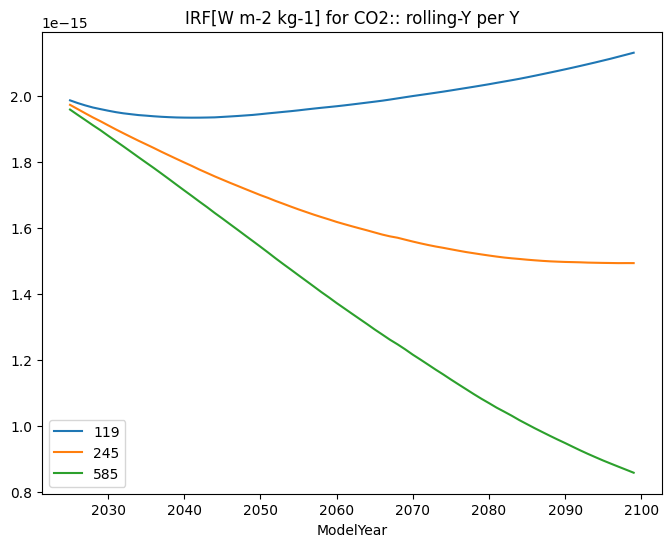

In [9]:
grouped = cf_df_y0.groupby("SSP")
fig, ax = plt.subplots(figsize=(8,6))
g_plot = lambda x:x.plot(x = "ModelYear", y = "CO2_IRF", ax=ax, label=x.name, title = "IRF[W m-2 kg-1] for CO2:: rolling-Y per Y")
grouped.apply(g_plot)
plt.show()

#### let's isolate SSP119, for CO2, Inst. RF[W m-2 kg-1] no longer declines (as it should? for each pulse emission RF always decline as it resides in the atmosphere ) 

SSP
119    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

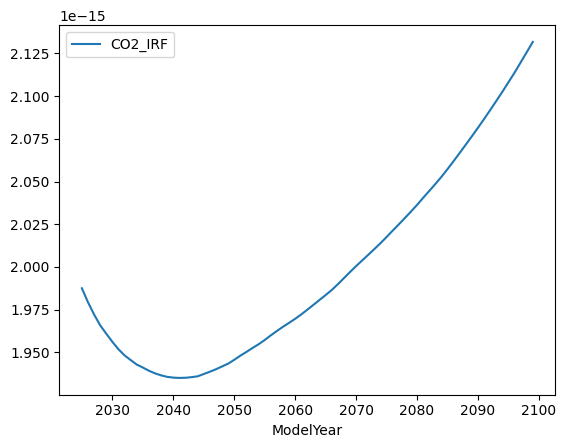

In [10]:
cf_df_y0[cf_df_y0['SSP'] == '119'].groupby("SSP").plot(kind="line",  y = "CO2_IRF", x="ModelYear")

compared to the new IRF used in the garbage truck ms, per ModelYear 2030 / 2040 / 2050:  
https://github.com/susierwu/dpLCA_GT/blob/main/dpLCIA/LCIA/1_CFanal_IRF.ipynb 

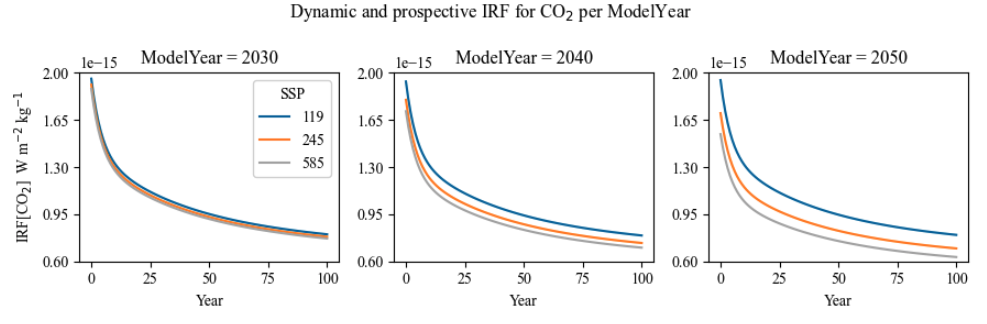 
    

### CH4 
get even more counter-intuitive IRF for SSP119 

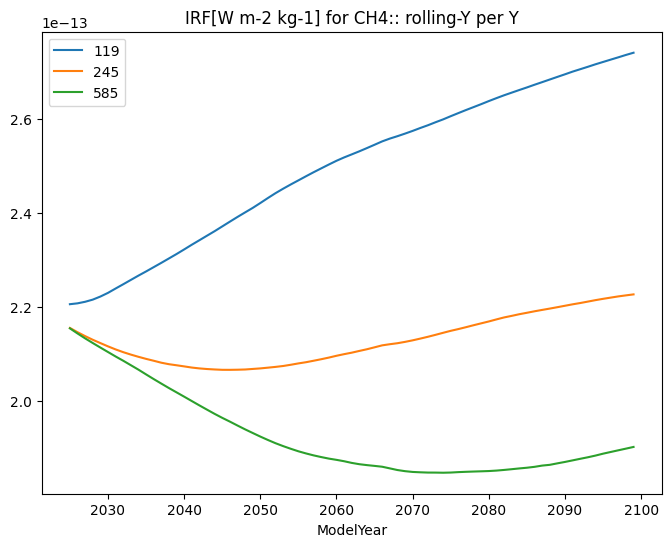

In [11]:
grouped = cf_df_y0.groupby("SSP")
fig, ax = plt.subplots(figsize=(8,6))
g_plot = lambda x:x.plot(x = "ModelYear", y = "CH4_IRF", ax=ax, label=x.name, title = "IRF[W m-2 kg-1] for CH4:: rolling-Y per Y")
grouped.apply(g_plot)
plt.show()

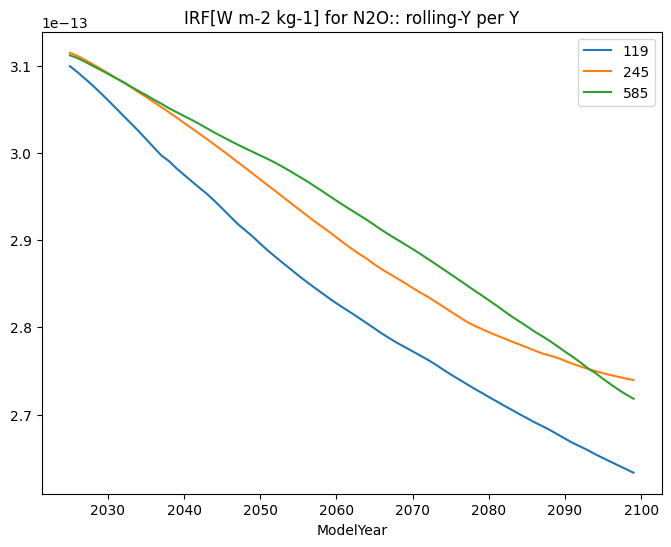

In [12]:
grouped = cf_df_y0.groupby("SSP")
fig, ax = plt.subplots(figsize=(8,6))
g_plot = lambda x:x.plot(x = "ModelYear", y = "N2O_IRF", ax=ax, label=x.name, title = "IRF[W m-2 kg-1] for N2O:: rolling-Y per Y")
grouped.apply(g_plot)
plt.show()

## 2. For CRF/AGWP, GWP can't use MY, Y[0] as now IRF changed per MY, CRF needs to calculated from the new rolling_y IRF

### if we can use this new rolling_y approach, then change the RE / alpha input in the module directly, to get final IRF,  CRF 

#### below code won't work for CRF / GWP, caz we need calculate AGWP[1-100]/ GWP[1-100] from the new IRF 

### CRF calc. from IRF 

In [13]:
def to_calc_crf_perIRF(irf_df, sp, gas_IRF):    
    crf = []
    irf_score = np.array(irf_df[irf_df["SSP"] == sp][gas_IRF])
    xt = np.arange(irf_score.shape[0])          
    crf_score = cumtrapz(irf_score, xt, initial=0)
    crf.append(crf_score) 
    return crf

In [14]:
# copy the IRF DF for same data shape
cf_df_calcrf = cf_df_y0.copy()

co2crf, ch4crf, n2ocrf = [],[],[]
for sp in np.unique(cf_df_calcrf["SSP"]): 
    co2crf_ssp = to_calc_crf_perIRF(cf_df_y0, sp, 'CO2_IRF')
    co2crf.append(co2crf_ssp) 

    ch4crf_ssp = to_calc_crf_perIRF(cf_df_y0, sp, 'CH4_IRF')  
    ch4crf.append(ch4crf_ssp) 
    
    n2ocrf_ssp = to_calc_crf_perIRF(cf_df_y0, sp, 'N2O_IRF')  
    n2ocrf.append(n2ocrf_ssp) 
    

In [15]:
#co2crf

In [16]:
## need to flatten twice
co2crf2 = [item for sublist in co2crf for item in sublist] 
cf_df_calcrf["CO2_CRF"] = [item for sublist in co2crf2 for item in sublist]
ch4crf2 = [item for sublist in ch4crf for item in sublist]
cf_df_calcrf["CH4_CRF"] =  [item for sublist in ch4crf2 for item in sublist]
n2ocrf2 = [item for sublist in n2ocrf for item in sublist]
cf_df_calcrf["N2O_CRF"] =  [item for sublist in n2ocrf2 for item in sublist]

In [17]:
cf_df_calcrf

,SSP,ModelYear,Year,CO2_IRF,CH4_IRF,N2O_IRF,CO2_CRF,CH4_CRF,N2O_CRF
0,119,2025,0,1.987496e-15,2.205437e-13,3.099572e-13,0.000000e+00,0.000000e+00,0.000000e+00
2,119,2026,0,1.979328e-15,2.207271e-13,3.092630e-13,1.983412e-15,2.206354e-13,3.096101e-13
4,119,2027,0,1.972169e-15,2.210606e-13,3.085103e-13,3.959160e-15,4.415292e-13,6.184968e-13
6,119,2028,0,1.965813e-15,2.215181e-13,3.077369e-13,5.928151e-15,6.628186e-13,9.266204e-13
8,119,2029,0,1.960901e-15,2.221757e-13,3.069077e-13,7.891507e-15,8.846655e-13,1.233943e-12
...,...,...,...,...,...,...,...,...,...
440,585,2095,0,8.963953e-16,1.886873e-13,2.740881e-13,9.751675e-14,1.348281e-11,2.056694e-11
442,585,2096,0,8.870420e-16,1.890455e-13,2.734659e-13,9.840847e-14,1.367167e-11,2.084072e-11
444,585,2097,0,8.777897e-16,1.894051e-13,2.728603e-13,9.929089e-14,1.386090e-11,2.111388e-11
446,585,2098,0,8.686672e-16,1.897607e-13,2.723055e-13,1.001641e-13,1.405048e-11,2.138646e-11


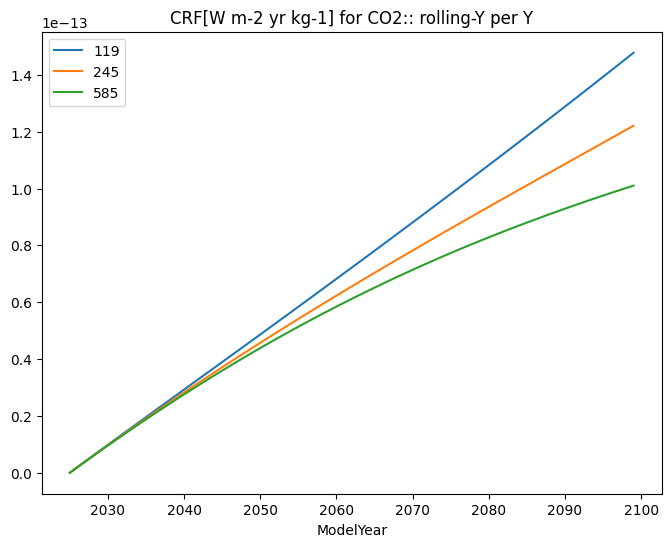

In [18]:
grouped = cf_df_calcrf.groupby("SSP")
fig, ax = plt.subplots(figsize=(8,6))
g_plot = lambda x:x.plot(x = "ModelYear", y = "CO2_CRF", ax=ax, label=x.name, title = "CRF[W m-2 yr kg-1] for CO2:: rolling-Y per Y")
grouped.apply(g_plot)
plt.show()

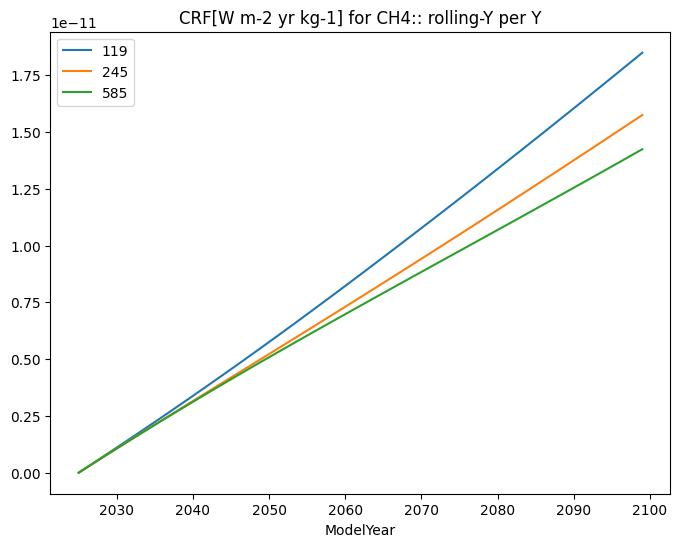

In [19]:
grouped = cf_df_calcrf.groupby("SSP")
fig, ax = plt.subplots(figsize=(8,6))
g_plot = lambda x:x.plot(x = "ModelYear", y = "CH4_CRF", ax=ax, label=x.name, title = "CRF[W m-2 yr kg-1] for CH4:: rolling-Y per Y")
grouped.apply(g_plot)
plt.show()

####  GWP calculated in this rolling_Y appraoch doesn't make sense from GWP20/100 perspective, it's no longer for a TH 20 or 100 for a specific ModelYear[t=0], same eq. is used, but IRF[t] is different, it's IRF[2030,2031...], so the GWP is a GWP[2030,2031...] 

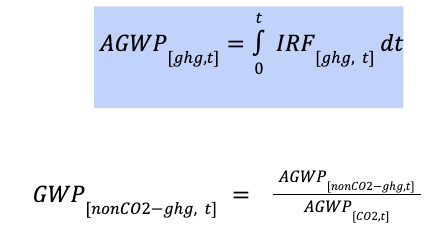

In [20]:
for sp in np.unique(cf_df_calcrf["SSP"]): 
    ddf = cf_df_calcrf[cf_df_calcrf["SSP"] == sp]
    ch4_gwp = ddf["CH4_CRF"]  / ddf["CO2_CRF"] 
    n2o_gwp  = ddf["N2O_CRF"]  / ddf["CO2_CRF"] 

In [21]:
ch4_gwp = pd.DataFrame( zip( list(2000 + np.arange(25,100,1)), ch4_gwp.values), columns = ['Year', 'GWP'])

,Year,GWP
0,2025,NaN
1,2026,110.089330
2,2027,110.261862
3,2028,110.443556
4,2029,110.630903


In [23]:
ch4_gwp 

,Year,GWP
0,2025,NaN
1,2026,110.089330
2,2027,110.261862
3,2028,110.443556
4,2029,110.630903
...,...,...
70,2095,138.261441
71,2096,138.927807
72,2097,139.598897
73,2098,140.274600


#### simple case: assuming an inventory with 20 kg annual CH4 emissions, from 2030 t0 2050: 


In [24]:
emis =  pd.DataFrame( zip( list( np.arange(2030,2050,1)),  [20] * len(np.arange(2030,2050,1))) , columns = ['Year', 'ch4_kg'])

#1. get IPCC default co2e:
ch4_gwp100 = 28 
ch4_gwp20 = 81

ch4_100 = sum(emis['ch4_kg'].values) * ch4_gwp100
ch4_20 = sum(emis['ch4_kg'].values) * ch4_gwp20

In [25]:
# 2. get rolling-Y co2e:
ch4_gwp['match_ch4'] = ch4_gwp['Year'].map(emis.set_index('Year')['ch4_kg'])
ch4_gwp['ch4_gwp_t'] = ch4_gwp['match_ch4'] * ch4_gwp['GWP']
ch4_gwp = ch4_gwp.dropna()

In [26]:
print(ch4_100, ch4_20, sum(ch4_gwp['ch4_gwp_t'].values))

11200 32400 45223.2935428134


<BarContainer object of 3 artists>

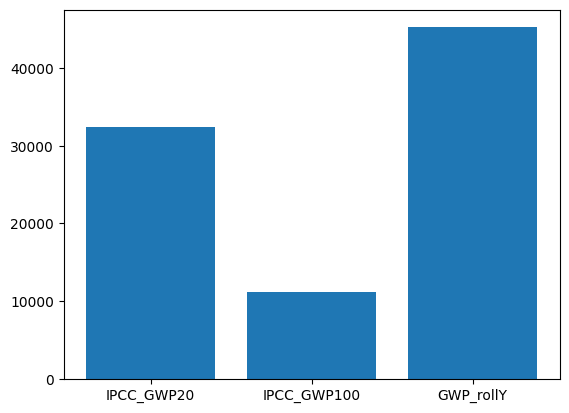

In [27]:
plt.bar(x = ['IPCC_GWP20', 'IPCC_GWP100', 'GWP_rollY'], height = [ch4_20, ch4_100,  sum(ch4_gwp['ch4_gwp_t'].values)])